In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import cartopy.crs as ccrs

In [17]:
# Читаем данные
df = pd.read_csv('telecom_customer_churn_origin.csv')

In [18]:
# Проверяем размер данных
df.shape

(7043, 38)

In [19]:
# Проверяем наличие дублированных строк
df.duplicated().sum()

0

In [20]:
# Открываем первые 5 строк данных
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [21]:
# На предыдущем этапе увидели, что есть столбец со статусом пользователя. Проверяем какие статусы есть
df['Customer Status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [22]:
# Проверяем количество пользователей по каждому статусу, выводим по убыванию
df.groupby('Customer Status')[['Customer ID']].count().sort_values('Customer ID', ascending = False).reset_index()

,Customer Status,Customer ID
0,Stayed,4720
1,Churned,1869
2,Joined,454


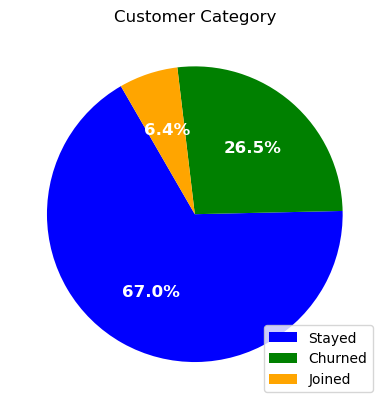

In [23]:
# Piechart о процентных соотношениях пользователей разных статусов
df.groupby('Customer Status').size().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.1f%%', textprops = {'color' : 'white', 'fontweight': 'bold', 'fontsize' : 12}, colors = ['blue', 'green', 'orange'], startangle = 120)
plt.title('Customer Category')
plt.legend(loc = 'lower right')
plt.show()

In [24]:
# Проверяем, сколько месяцев, в среднем, каждая из категории пользователей пользуются услугами
df.groupby('Customer Status')[['Tenure in Months']].mean().round(1).sort_values('Tenure in Months', ascending = False).reset_index()

,Customer Status,Tenure in Months
0,Stayed,41.0
1,Churned,18.0
2,Joined,1.7


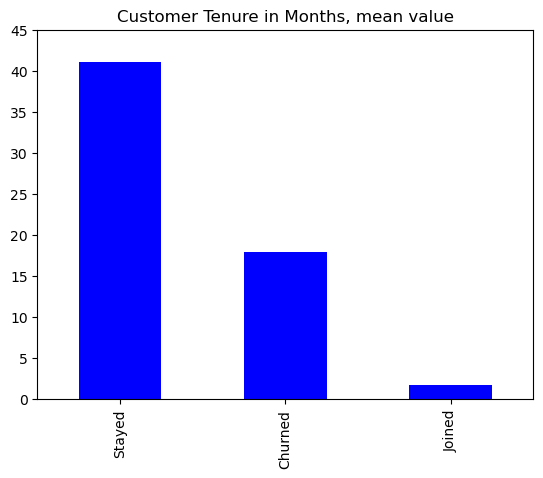

In [25]:
# Выводим в виде графика информацию выше
df.groupby('Customer Status')['Tenure in Months'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
plt.yticks(np.arange(0, 50, 5))
plt.xlabel('')
plt.title('Customer Tenure in Months, mean value')
plt.show()

In [26]:
# Проверяем, сколько месяцев (медианное значение) каждая из категории пользователей пользуются услугами
df.groupby('Customer Status')[['Tenure in Months']].median().sort_values('Tenure in Months', ascending = False).reset_index()

,Customer Status,Tenure in Months
0,Stayed,42.0
1,Churned,10.0
2,Joined,1.0


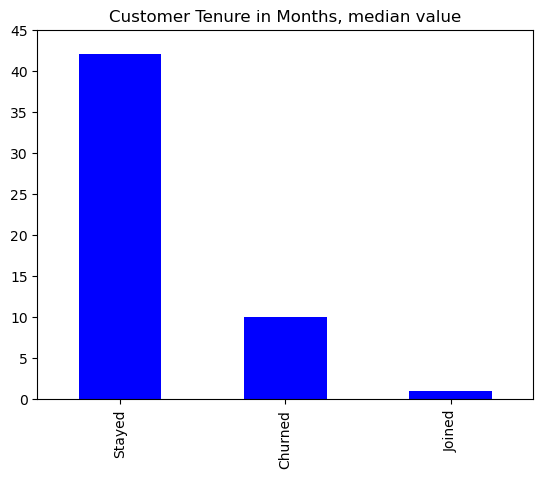

In [27]:
# выводим в виде графика информацию выше
df.groupby('Customer Status')['Tenure in Months'].median().sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
plt.yticks(np.arange(0, 50, 5))
plt.xlabel('')
plt.title('Customer Tenure in Months, median value')
plt.show()

In [28]:
# Будем считать персентили каждой из категории, сколько месяцев они пользуются услугами 
q1_stayed = np.percentile(df[df['Customer Status'] == 'Stayed']['Tenure in Months'], 25)
q2_stayed = np.percentile(df[df['Customer Status'] == 'Stayed']['Tenure in Months'], 50)
q3_stayed = np.percentile(df[df['Customer Status'] == 'Stayed']['Tenure in Months'], 75)

q1_churned = np.percentile(df[df['Customer Status'] == 'Churned']['Tenure in Months'], 25)
q2_churned = np.percentile(df[df['Customer Status'] == 'Churned']['Tenure in Months'], 50)
q3_churned = np.percentile(df[df['Customer Status'] == 'Churned']['Tenure in Months'], 75)

q1_joined = np.percentile(df[df['Customer Status'] == 'Joined']['Tenure in Months'], 25)
q2_joined = np.percentile(df[df['Customer Status'] == 'Joined']['Tenure in Months'], 50)
q3_joined = np.percentile(df[df['Customer Status'] == 'Joined']['Tenure in Months'], 75)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


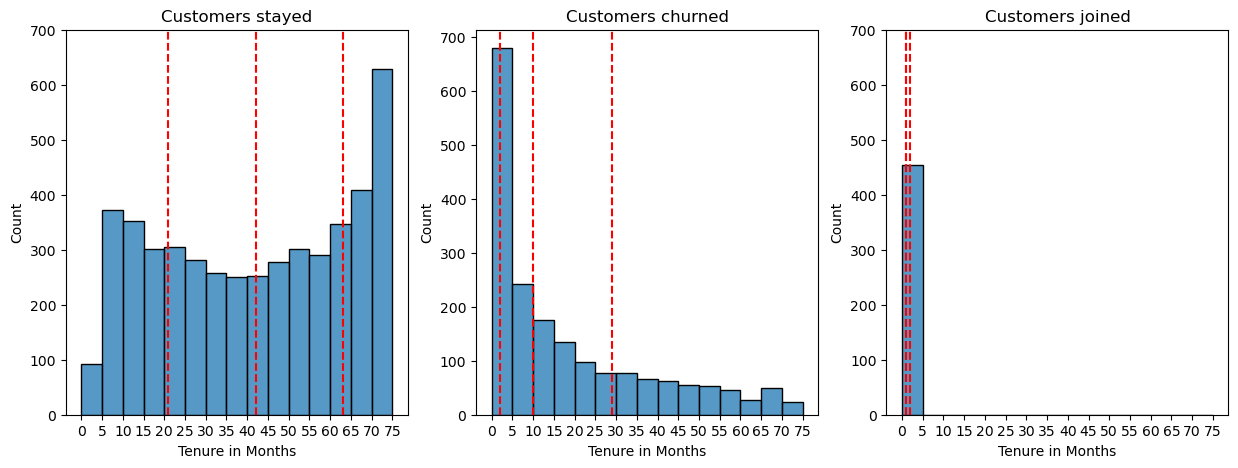

In [29]:
# выводим сколько месяцев каждая из категории пользователей пользуются услугами, в гистограммах и персентилях

fig, axs = plt.subplots(1, 3, figsize = (15,5))

sns.histplot(df[df['Customer Status'] == 'Stayed']['Tenure in Months'], ax = axs[0], bins = np.arange(0,80,5))
axs[0].axvline(x = q1_stayed, color = 'red', linestyle = '--')
axs[0].axvline(x = q2_stayed, color = 'red', linestyle = '--')
axs[0].axvline(x = q3_stayed, color = 'red', linestyle = '--')
axs[0].set_yticks(np.arange(0,800,100))
axs[0].set_xticks(np.arange(0,80,5))
axs[0].set_title('Customers stayed')

sns.histplot(df[df['Customer Status'] == 'Churned']['Tenure in Months'], ax = axs[1], bins = np.arange(0,80,5))
axs[1].axvline(x = q1_churned, color = 'red', linestyle = '--')
axs[1].axvline(x = q2_churned, color = 'red', linestyle = '--')
axs[1].axvline(x = q3_churned, color = 'red', linestyle = '--')
axs[1].set_yticks(np.arange(0,800,100))
axs[1].set_xticks(np.arange(0,80,5))
axs[1].set_title('Customers churned')

sns.histplot(df[df['Customer Status'] == 'Joined']['Tenure in Months'], ax = axs[2], bins = np.arange(0,80,5))
axs[2].axvline(x = q1_joined, color = 'red', linestyle = '--')
axs[2].axvline(x = q2_joined, color = 'red', linestyle = '--')
axs[2].axvline(x = q3_joined, color = 'red', linestyle = '--')
axs[2].set_yticks(np.arange(0,800,100))
axs[2].set_xticks(np.arange(0,80,5))
axs[2].set_title('Customers joined')

plt.show()

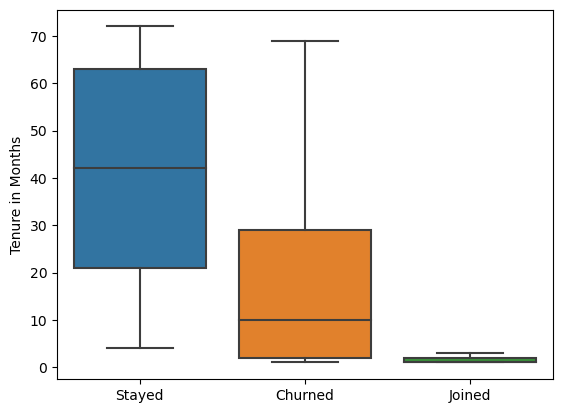

In [30]:
# Та же самая информация, для лучшего понимания, выведена в виде боксплота

sns.boxplot(x = 'Customer Status', y = 'Tenure in Months', showfliers = False, data = df)
plt.xlabel('')
plt.show()

In [31]:
df[df['Customer Status'] == 'Churned'].describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1699.000000,1756.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,49.735688,0.118245,93435.752809,36.026801,-119.670474,0.521134,17.979133,25.485762,23.602506,73.347592,1531.796094,1.518983,7.158909,433.917549,1971.353569
std,17.604893,0.549902,1823.231029,2.497264,2.149758,1.094667,19.531123,14.216563,17.975205,26.373764,1890.822994,7.041632,24.857342,650.358302,2438.441813
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.020000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,35.000000,0.000000,92117.000000,33.890046,-121.719489,0.000000,2.000000,13.015000,11.000000,55.300000,134.500000,0.000000,0.000000,31.160000,175.850000
50%,50.000000,0.000000,93292.000000,35.490705,-119.285484,0.000000,10.000000,25.770000,20.000000,79.500000,703.550000,0.000000,0.000000,139.080000,893.550000
75%,65.000000,0.000000,95258.000000,38.055562,-117.810896,1.000000,29.000000,37.670000,28.000000,94.200000,2331.300000,0.000000,0.000000,527.940000,2888.760000
max,80.000000,7.000000,96150.000000,41.962127,-115.191857,9.000000,72.000000,49.980000,85.000000,118.350000,8684.800000,49.570000,150.000000,3508.820000,11195.440000


In [32]:
df[df['Customer Status'] == 'Joined'].describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,416.000000,272.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,42.870044,0.361233,93407.207048,36.163979,-119.742376,0.949339,1.720264,24.338293,25.496324,42.775991,79.292731,0.238656,2.378855,38.125991,119.558921
std,14.917827,0.869850,1845.235249,2.419544,2.138200,2.439482,0.818486,14.201172,20.008669,24.612329,67.286088,2.749229,9.655299,33.708099,89.466565
min,19.000000,0.000000,90001.000000,32.641640,-124.240051,0.000000,1.000000,1.150000,2.000000,-8.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,31.000000,0.000000,92027.250000,34.005057,-121.691441,0.000000,1.000000,11.815000,12.000000,20.162500,25.250000,0.000000,0.000000,11.187500,56.970000
50%,42.000000,0.000000,93427.000000,35.630059,-119.389085,0.000000,1.000000,24.805000,21.000000,43.975000,51.425000,0.000000,0.000000,30.680000,91.095000
75%,54.000000,0.000000,95302.500000,38.018852,-118.027301,0.000000,2.000000,37.117500,28.000000,64.350000,107.212500,0.000000,0.000000,51.495000,166.240000
max,80.000000,5.000000,96146.000000,41.831901,-114.716120,10.000000,3.000000,49.910000,85.000000,107.950000,335.750000,38.840000,70.000000,148.890000,456.100000


In [77]:
# Убираем категорию недавно присоединившихся пользователей из таблицы. В дальнейшем их учитывать не будем.
# Создаем отдельную таблицу для недавно присодинившихся пользователей. В последующем с помощью алгоритмов машинного обучения
# можем спрогнозировать их поведение

df_without_joined = df[df['Customer Status'] != 'Joined'].reset_index()

df_joined_only = df[df['Customer Status'] == 'Joined'].reset_index()

In [36]:
df_without_joined.groupby('Customer Status')[['Customer ID']].count().sort_values('Customer ID', ascending = False).reset_index()

,Customer Status,Customer ID
0,Stayed,4720
1,Churned,1869


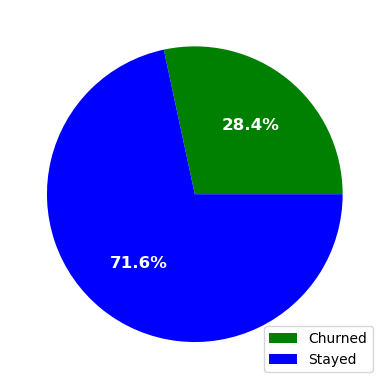

In [37]:
# Проверяем соотношение оставшихся и ушедших пользователей

df_without_joined.groupby('Customer Status').size().plot(kind = 'pie', autopct='%1.1f%%', textprops={'color': 'white', 'fontweight': 'bold', 'fontsize' : 12}, colors = ['green', 'blue'])
plt.legend(loc = 'lower right')
plt.show()

In [38]:
# Проверяем сами данные для обработки

df_without_joined.isnull().sum()

index                                   0
Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3598
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                      

In [39]:
# Проверяем среднее значение по столбцу 'Avg Monthly Long Distance Charges'

df_without_joined['Avg Monthly Long Distance Charges'].mean()

25.49624558452481

In [40]:
# Проверяем среднее значение по столбцу 'Avg Monthly GB Download'

df_without_joined['Avg Monthly GB Download'].mean()

26.22592945662536

In [41]:
# Заполняем все пустые ячейки в столбце 'Avg Monthly Long Distance Charges' средним значением данного столбца 

df_without_joined['Avg Monthly Long Distance Charges'] = df_without_joined['Avg Monthly Long Distance Charges'].fillna(value = df_without_joined['Avg Monthly Long Distance Charges'].mean())

In [42]:
# Заполняем все пустые ячейки в столбце 'Avg Monthly GB Download' средним значением данного столбца 

df_without_joined['Avg Monthly GB Download'] = df_without_joined['Avg Monthly GB Download'].fillna(value = df_without_joined['Avg Monthly GB Download'].mean())

In [43]:
# Перероверяем среднее значение по столбцу 'Avg Monthly Long Distance Charges' после заполнения пустых ячеек

df_without_joined['Avg Monthly Long Distance Charges'].mean()

25.49624558452481

In [44]:
# Перероверяем среднее значение по столбцу 'Avg Monthly GB Download' после заполнения пустых ячеек

df_without_joined['Avg Monthly GB Download'].mean()

26.225929456625355

In [45]:
# Заполняем пустые ячейки большинства столбцов 0.

df_without_joined[['Offer', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']] = df_without_joined[['Offer', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']].fillna(value=0)

In [82]:
# Перопроверяем наши данные после заполнения пустых ячеек 0. Пустые ячейки в двух столбцах не стали заполнять.

df_without_joined.isnull().sum()

index                                   0
Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                      

In [46]:
# Проверяем категорию ушедших пользователей и выводим по убыванию количества ушедших пользователей

df_without_joined.groupby('Churn Category')[['Customer ID']].count().sort_values('Customer ID', ascending = False).reset_index()

,Churn Category,Customer ID
0,Competitor,841
1,Dissatisfaction,321
2,Attitude,314
3,Price,211
4,Other,182


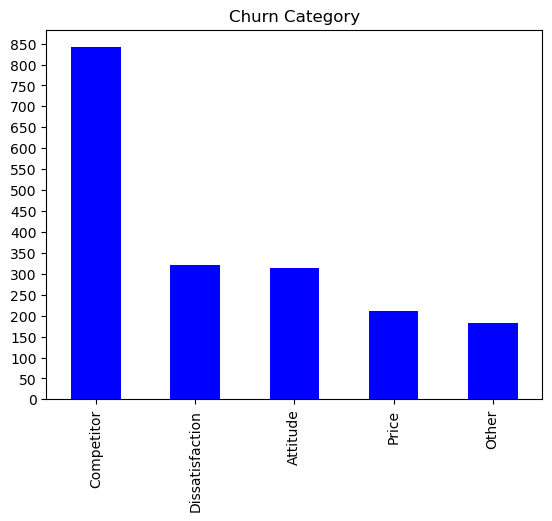

In [47]:
# Выводим в виде графика информацию выше.

df_without_joined.groupby('Churn Category').size().sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
plt.title('Churn Category')
plt.yticks(np.arange(0, 900, 50))
plt.xlabel('')
plt.show()

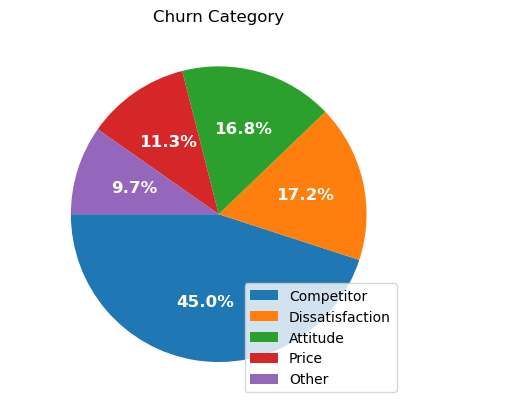

In [48]:
# Выводим в виде Piechart информацию выше.

df_without_joined.groupby('Churn Category').size().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.1f%%', textprops={'color': 'white', 'fontweight': 'bold', 'fontsize' : 12}, startangle = 180)
plt.title('Churn Category')
plt.legend(loc = 'lower right')
plt.show()

In [49]:
# Создаем под-таблицы по каждой категории ушедших пользователей.

competitor = df_without_joined[df_without_joined['Churn Category'] == 'Competitor']
dissatisfaction = df_without_joined[df_without_joined['Churn Category'] == 'Dissatisfaction']
attitude = df_without_joined[df_without_joined['Churn Category'] == 'Attitude']
price = df_without_joined[df_without_joined['Churn Category'] == 'Price']
other = df_without_joined[df_without_joined['Churn Category'] == 'Other']

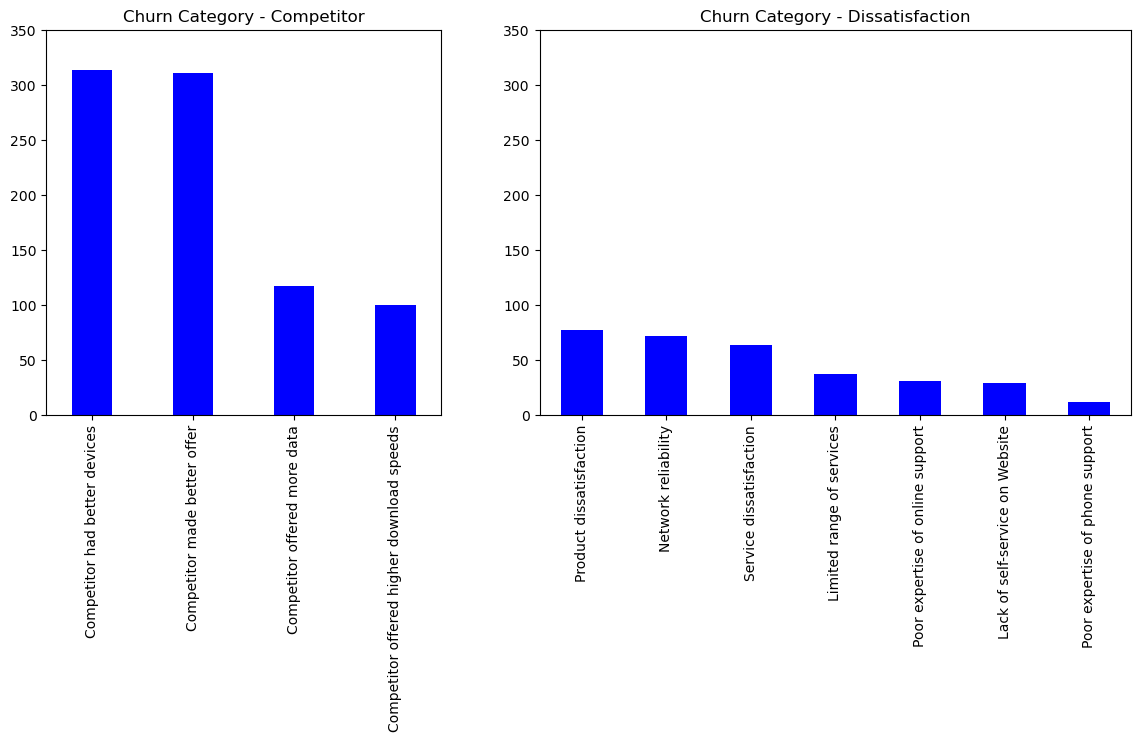

In [50]:
# Проверяем причину ухода первых двух категорий ушедших пользователей. Выводим по убыванию.

fig, axs = plt.subplots(1, 2, figsize = (14, 5), gridspec_kw={'width_ratios': [2, 3]})

competitor.groupby('Churn Reason').size().sort_values(ascending = False).plot(kind = 'bar', color = 'blue', width = 0.4, ax = axs[0])
axs[0].set_yticks(np.arange(0, 400, 50))
axs[0].set_xlabel('')
axs[0].set_title('Churn Category - Competitor')

dissatisfaction.groupby('Churn Reason').size().sort_values(ascending = False).plot(kind = 'bar', color = 'blue', ax = axs[1])
axs[1].set_yticks(np.arange(0, 400, 50))
axs[1].set_xlabel('')
axs[1].set_title('Churn Category - Dissatisfaction')

plt.show()

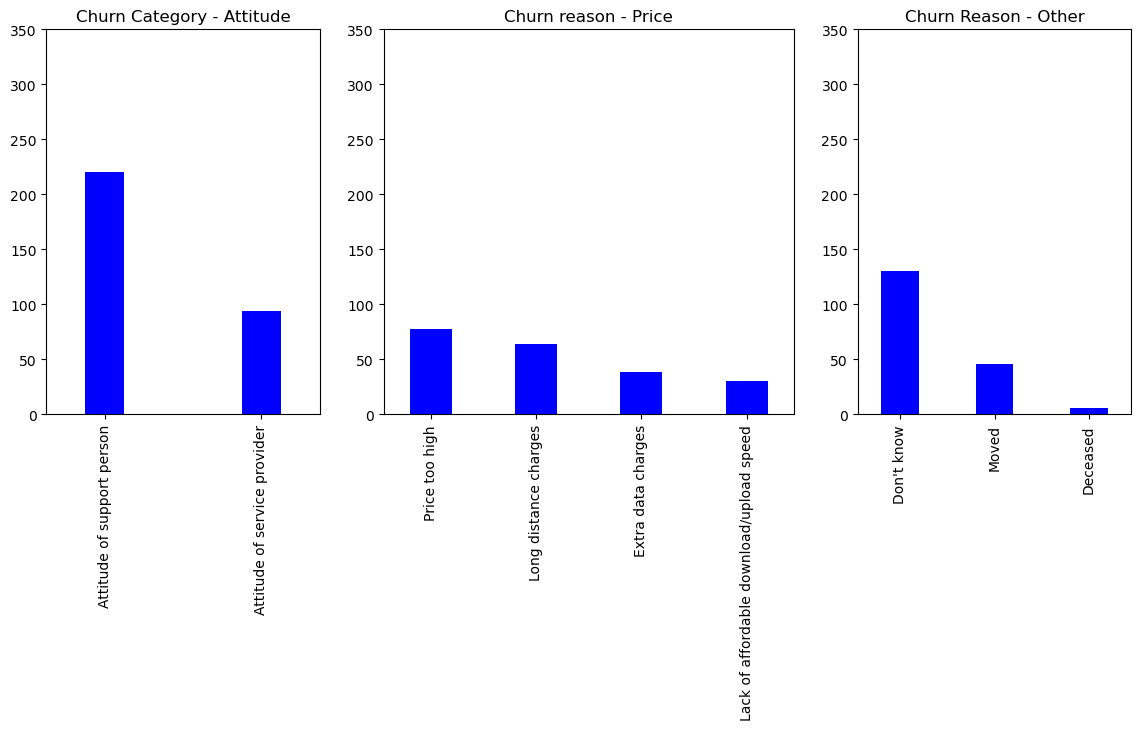

In [51]:
# Проверяем причину ухода оставшихся трех категорий ушедших пользователей. Выводим по убыванию.


fig, axs = plt.subplots(1, 3, figsize = (14, 5), gridspec_kw={'width_ratios': [2, 3, 2]})

attitude.groupby('Churn Reason').size().sort_values(ascending = False).plot(kind = 'bar', color = 'blue', width = 0.25, ax = axs[0])
axs[0].set_yticks(np.arange(0, 400, 50))
axs[0].set_xlabel('')
axs[0].set_title('Churn Category - Attitude')

price.groupby('Churn Reason').size().sort_values(ascending = False).plot(kind = 'bar', color = 'blue', ax = axs[1], width = 0.4)
axs[1].set_yticks(np.arange(0, 400, 50))
axs[1].set_title('Churn reason - Price')
axs[1].set_xlabel('')

other.groupby('Churn Reason').size().sort_values(ascending = False).plot(kind = 'bar', color = 'blue', ax = axs[2], width = 0.4)
axs[2].set_yticks(np.arange(0, 400, 50))
axs[2].set_title('Churn Reason - Other')
axs[2].set_xlabel('')

plt.show()

In [52]:
# Создаем новую таблицу, где будут указаны только причины уходу по количеству ушедших пользователей в убывающем порядке

df_without_joined_churn_reason = df_without_joined.groupby('Churn Reason')[['Customer ID']].count().sort_values('Customer ID', ascending = False).reset_index()

In [53]:
# В только созданную таблицу добавляем новый столбец для отображения аккумулированного количества ушедших пользователей

df_without_joined_churn_reason['Cumulative'] = df_without_joined_churn_reason['Customer ID'].cumsum()

In [54]:
# Смотрим только созданную таблицу

df_without_joined_churn_reason

,Churn Reason,Customer ID,Cumulative
0,Competitor had better devices,313,313
1,Competitor made better offer,311,624
2,Attitude of support person,220,844
3,Don't know,130,974
4,Competitor offered more data,117,1091
5,Competitor offered higher download speeds,100,1191
6,Attitude of service provider,94,1285
7,Price too high,78,1363
8,Product dissatisfaction,77,1440
9,Network reliability,72,1512


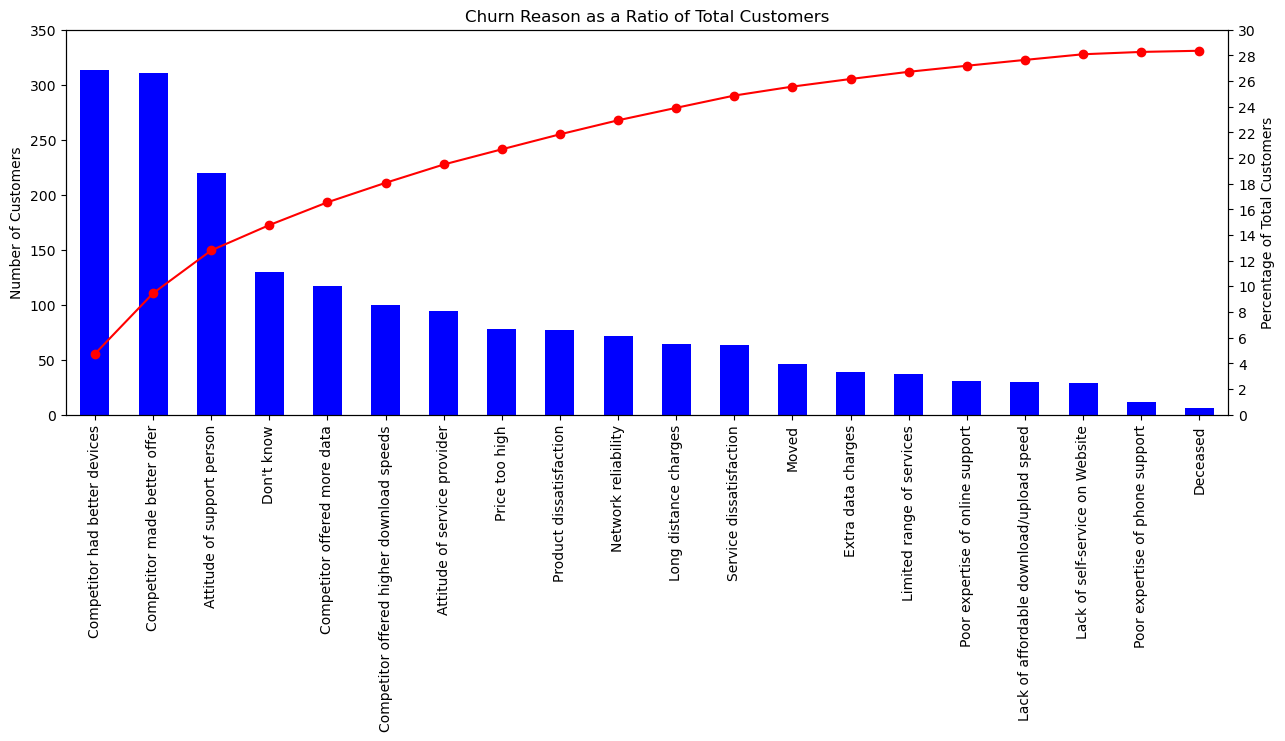

In [56]:
# Выводим в виде графика информацию о том, сколько человек (в % значении) от общего количества пользователей (оставшиеся + ушедшие)
# ушли по той или иной причине

plt.figure(figsize=(15, 5))
df_without_joined.groupby('Churn Reason').size().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.ylabel('Number of Customers')
plt.yticks(np.arange(0, 400, 50))
plt.xlabel('')
plt.title('Churn Reason as a Ratio of Total Customers')

plt.twinx()
plt.plot(df_without_joined_churn_reason['Churn Reason'], (df_without_joined_churn_reason['Cumulative'] / df_without_joined['Customer ID'].count()) * 100, color='r', marker='o')
plt.ylabel('Percentage of Total Customers')
plt.yticks(np.arange(0, 32, 2))

plt.show()

### В дальнейшем, будем пытаться понять какие именно пользователи ушли по той или иной причине

In [58]:
# Статус пользователя поменяем Stayed на 1, Churned на 0.

df_without_joined['Customer Status'] = df_without_joined['Customer Status'].replace({'Stayed' : 1, 'Churned' : 0})

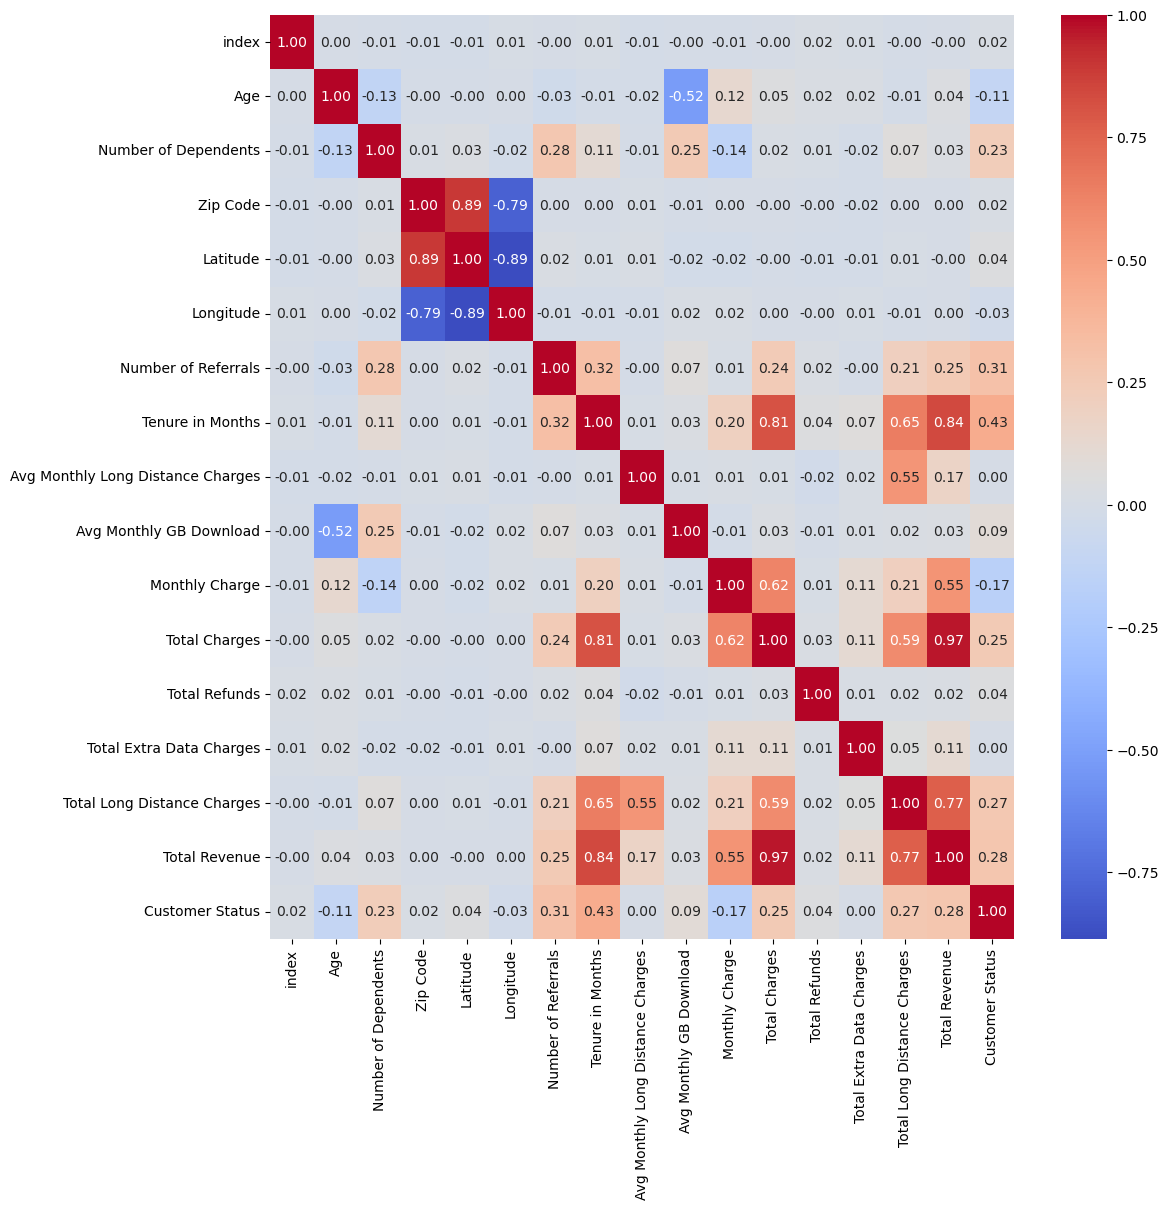

In [59]:
# Посмотрим корреляцию числовых значений в таблице к статусу пользователя и по отношению друг к другу.

numerical_columns = df_without_joined.select_dtypes(include = ['float64', 'int64']).columns
object_columns = df_without_joined.select_dtypes(include = ['object']).columns

numerical_df_without_joined = df_without_joined[numerical_columns]
correlation_matrix = numerical_df_without_joined.corr()

plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Что бросается в глаза?

### 1. Сильная корреляция между индексом, широтой и долготой. Но, оно понятно. Корреляцию с другими параметрами, в том числе со статусом пользователя, эти три параметра не имеют. То есть, географическое расположение пользователя на его уход не влияет. 

Ниже можем дополнительно проверить.

In [60]:
# Проверяем во скольких городах пользуются услугами. 1106 - слишком много, нет возможности проверять в разрезе городов. 
# Проверим на карте

df_without_joined['City'].unique().size

1106

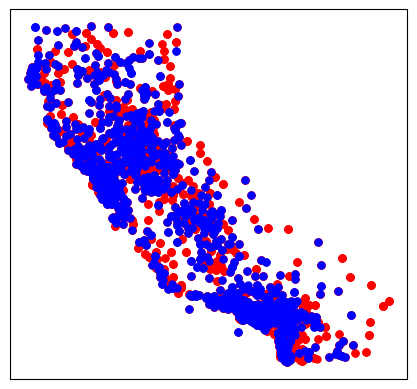

In [61]:
# Выводим локацию пользователей по долготе и широте

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(df_without_joined[df_without_joined['Customer Status'] == 1]['Longitude'], df_without_joined[df_without_joined['Customer Status'] == 1]['Latitude'], 
        marker='o', color='red', markersize=5, linestyle='');
ax.plot(df_without_joined[df_without_joined['Customer Status'] == 0]['Longitude'], df_without_joined[df_without_joined['Customer Status'] == 0]['Latitude'], 
        marker='o', color='blue', markersize=5, linestyle='');

### Эти три столбца, для удобства пользования данными, можно удалить из таблицы. В дальнейшем, все не нужные для выявления причин ухода пользователей столбцы будем удалять из таблицы

In [62]:
# Удаляем ненужные столбцы

df_without_joined.drop(['Customer ID', 'Zip Code', 'Latitude', 'Longitude', 'index', 'City'], axis = 1, inplace = True)

In [63]:
df_without_joined.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

### Теперь, важный момент: создаем копию нашей таблицы, в которой все столбцы с ответами "Да" и "Нет" будем менять. Да - 1. Нет - 0.

In [64]:
# Создаем копию таблицы

df_without_joined_corr_table = df_without_joined

In [66]:
# Заменяем данные в столбцах. Да - 1, Нет - 0.

df_without_joined_corr_table['Gender'] = df_without_joined_corr_table['Gender'].replace({'Female' : 1, 'Male' : 0})

df_without_joined_corr_table['Married'] = df_without_joined_corr_table['Married'].replace({'Yes' : 1, 'No': 0})

df_without_joined_corr_table['Phone Service'] = df_without_joined_corr_table['Phone Service'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Multiple Lines'] = df_without_joined_corr_table['Multiple Lines'].replace({'Yes' : 1, 'No': 0})

df_without_joined_corr_table['Internet Service'] = df_without_joined_corr_table['Internet Service'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Internet Type'] = df_without_joined_corr_table['Internet Type'].replace({'Yes' : 1, 'No': 0})

df_without_joined_corr_table['Online Security'] = df_without_joined_corr_table['Online Security'].replace({'Yes' : 1, 'No': 0})

df_without_joined_corr_table['Online Backup'] = df_without_joined_corr_table['Online Backup'].replace({'Yes' : 1, 'No': 0})

df_without_joined_corr_table['Device Protection Plan'] = df_without_joined_corr_table['Device Protection Plan'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Premium Tech Support'] = df_without_joined_corr_table['Premium Tech Support'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Streaming TV'] = df_without_joined_corr_table['Streaming TV'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Streaming Movies'] = df_without_joined_corr_table['Streaming Movies'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Streaming Music'] = df_without_joined_corr_table['Streaming Music'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Unlimited Data'] = df_without_joined_corr_table['Unlimited Data'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Paperless Billing'] = df_without_joined_corr_table['Paperless Billing'].replace({'Yes' : 1, 'No' : 0})

df_without_joined_corr_table['Customer Status'] = df_without_joined_corr_table['Customer Status'].replace({'Stayed' : 1, 'Churned' : 0})

In [67]:
# Проверяем во всех ли столбцах изменились данные

df_without_joined_corr_table.dtypes

Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract                              object
Paperless 

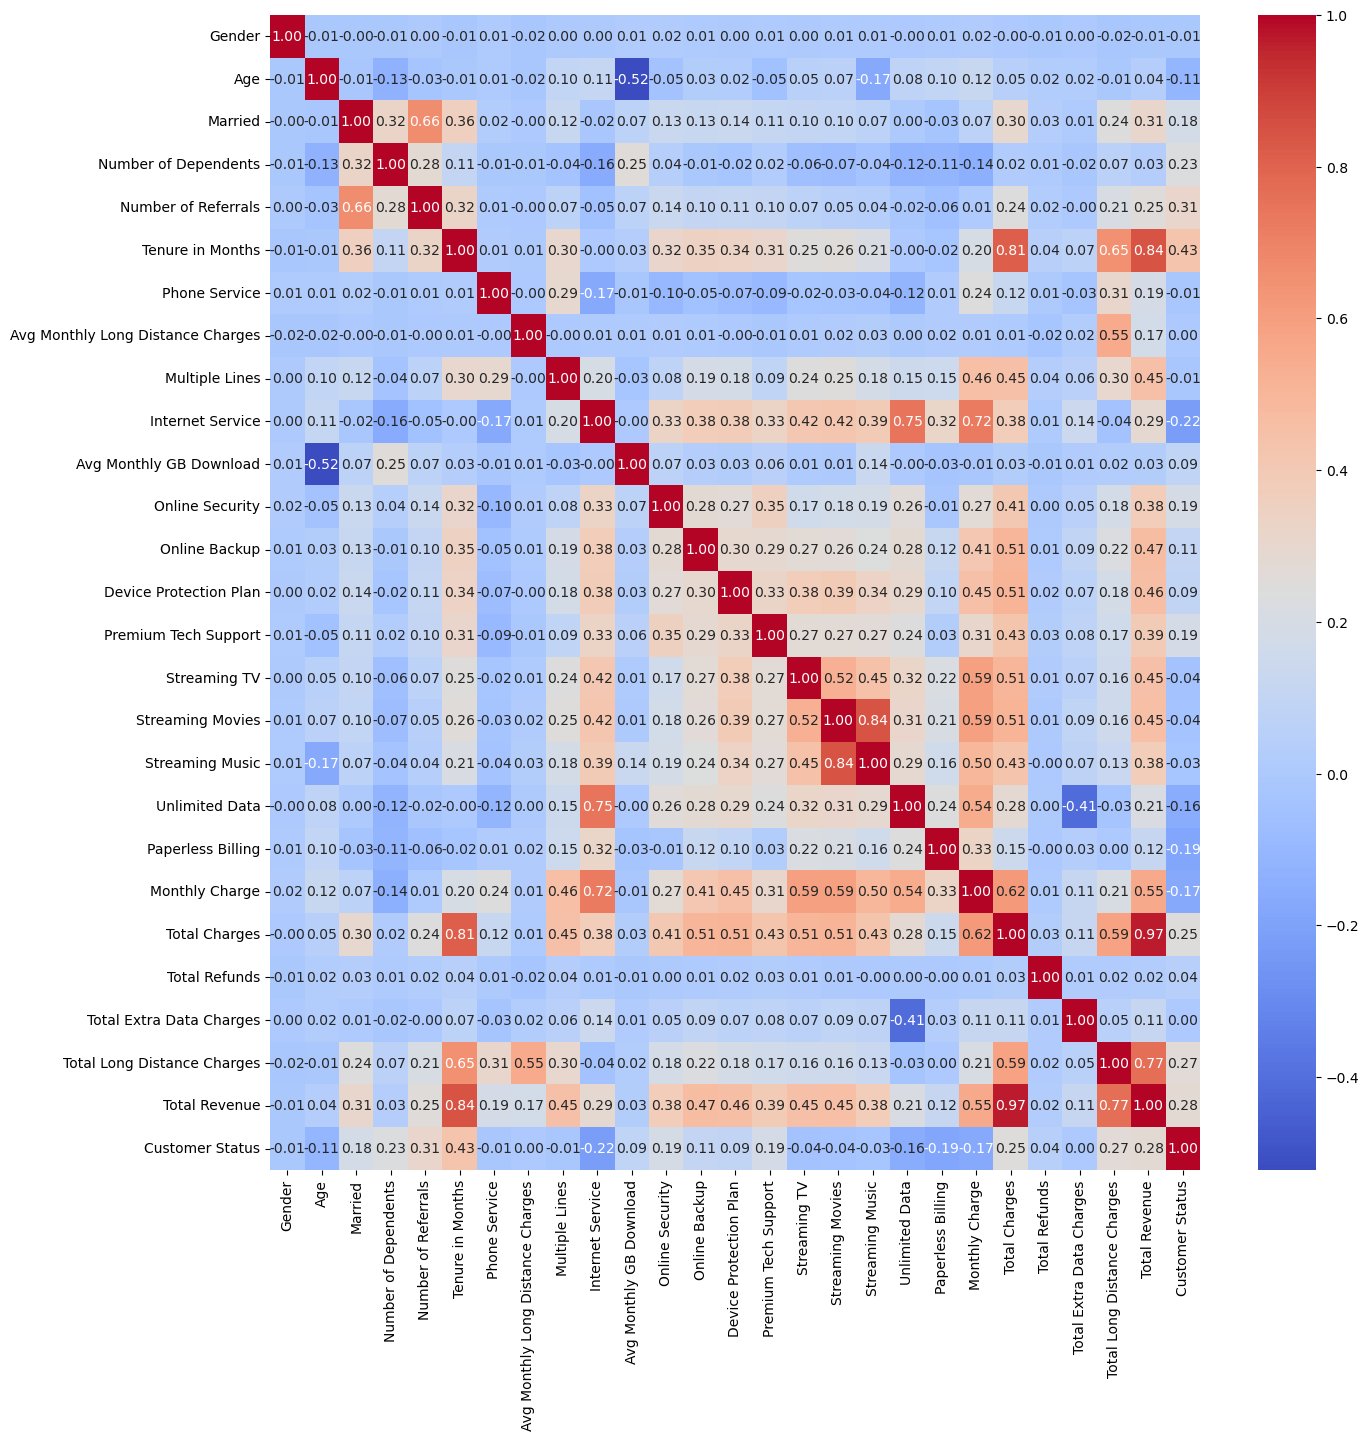

In [68]:
# Заново посмотрим корреляцию числовых значений в таблице к статусу пользователя и по отношению друг к другу.

numerical_columns = df_without_joined_corr_table.select_dtypes(include = ['float64', 'int64']).columns
object_columns = df_without_joined_corr_table.select_dtypes(include = ['object']).columns

numerical_df_without_joined_corr_table = df_without_joined_corr_table[numerical_columns]
correlation_matrix = numerical_df_without_joined_corr_table.corr()

plt.figure(figsize = (15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Согласно таблице выше, факторы, не влияющие на статус пользователя:

1. Пол
2. Телефонный сервис
3. Среднемесячная плата за междугородную связь
4. Наличие нескольких линий
5. Среднемесячный объем загрузки данных
6. Стриминговые сервисы (ТВ, фильмы, музыка)

### Согласно таблице выше, факторы, отрицательно влияющие на статус пользователя (уходят):

1. Возраст. Возрастные пользователи больше уходили.
2. Интернет сервис. Пользователи, пользовавшиеся интернет сервисом, больше уходили.
3. Безбумажная оплата. Пользователи, пользовашиеся безбумажной оплатой, больше уходили.
4. Ежемесячная оплата. Пользователи, у которых была высокая ежемесячная оплата, больше уходили.

### Согласно таблице выше, факторы, положительно влияющие на статус пользователя (остаются):

1. Семейное положение. Женатые/замужние пользователи склонны остаться.
2. Количество иждивенцев. Пользователи, имеющие иждивенцев, склонны остаться.
3. Количество рефералов. Пользователи, имеющие больше рефералов, склонны остаться.
4. Срок пользования в месяцах. Чем дольше пользуется, тем больше склонны остаться.
5. Онлайн безопасность.
6. Онлайн резервное копирование
7. Защита устройства
8. Премиальная техническая поддержка

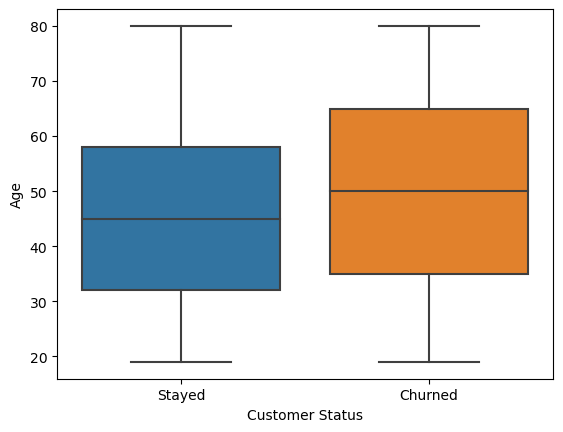

In [78]:
# Действительно, большинство ушедших пользователей старьше по возрасту чем оставшиеся.

sns.boxplot(x = 'Customer Status', y = 'Age', data = df_without_joined)
plt.show()

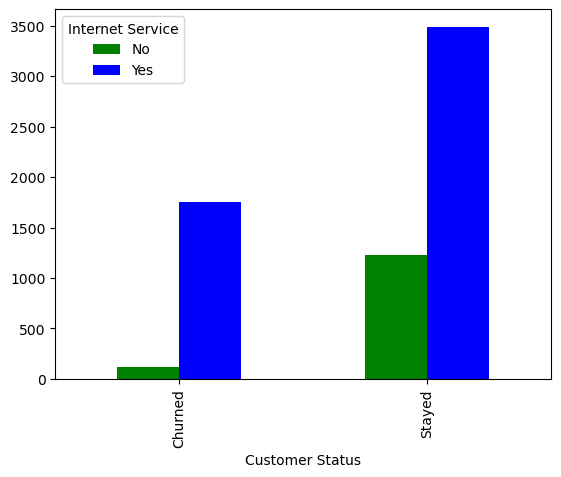

In [79]:
# Действительно, большинство ушедших пользователей пользовались интернетом.

df_without_joined.groupby(['Customer Status', 'Internet Service']).size().unstack().plot(kind = 'bar', color = ('green', 'blue'))
plt.show()

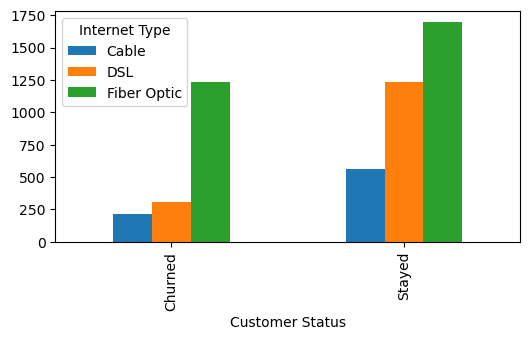

In [80]:
# Что им могло не понравится в интернете?

df_without_joined.groupby(['Customer Status', 'Internet Type']).size().unstack().plot(kind = 'bar', grid = False, figsize = (6,3))
plt.show()

# Большинство ушедших пользовались оптоволоконным интернетом.

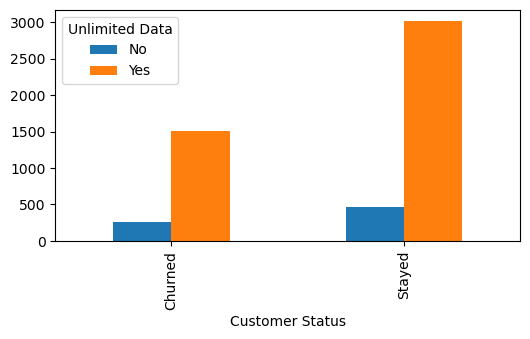

In [81]:
# Что им могло не понравится в интернете?

df_without_joined.groupby(['Customer Status', 'Unlimited Data']).size().unstack().plot(kind = 'bar', grid = False, figsize = (6,3))
plt.show()

# Большинство ушедших пользовались безлимитным интернетом.

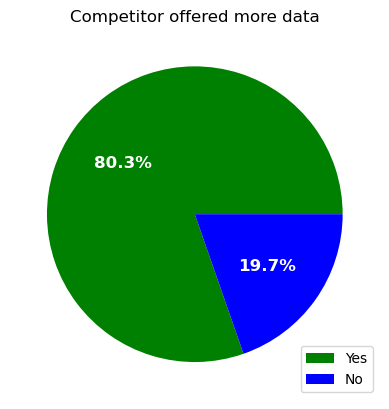

In [84]:
# Можно предположить, что у нас низкая скорость загрузки на оптоволоконном интернете.

df_without_joined[df_without_joined['Churn Reason'] == 'Competitor offered more data'].groupby('Unlimited Data').size().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.1f%%', textprops={'color': 'white', 'fontweight': 'bold', 'fontsize' : 12}, colors = ['green', 'blue'])
plt.title('Competitor offered more data')
plt.legend(loc = 'lower right')
plt.show()

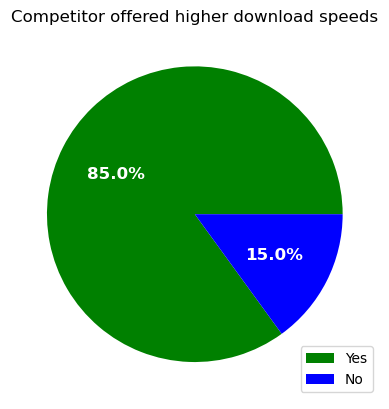

In [85]:
# Можно предположить, что у нас низкая скорость загрузки на оптоволоконном интернете.

df_without_joined[df_without_joined['Churn Reason'] == 'Competitor offered higher download speeds'].groupby('Unlimited Data').size().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.1f%%', textprops={'color': 'white', 'fontweight': 'bold', 'fontsize' : 12}, colors = ['green', 'blue'])
plt.title('Competitor offered higher download speeds')
plt.legend(loc = 'lower right')
plt.show()

In [75]:
df_without_joined['Churn Reason'].unique()

array([nan, 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

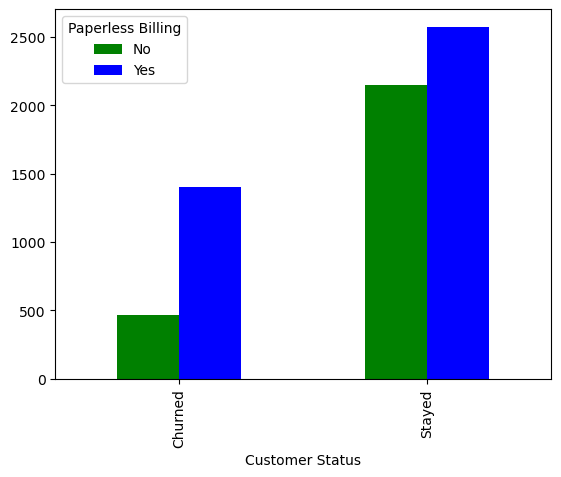

In [86]:
# Действительно, большинство ушедших пользоватлей пользовались безбумажной оплатой.

df_without_joined.groupby(['Customer Status', 'Paperless Billing']).size().unstack().plot(kind = 'bar', color = ('green', 'blue'))
plt.show()

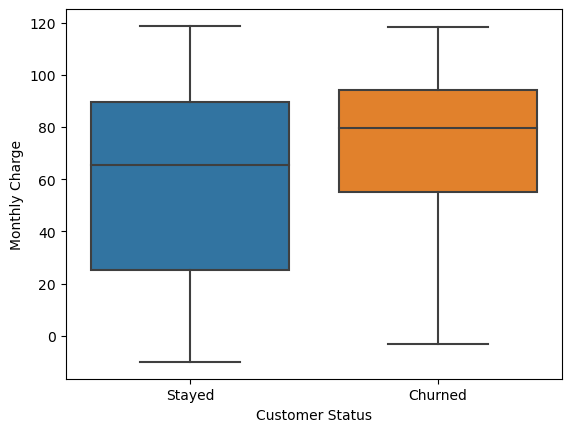

In [87]:
# Действительно, большинство ушедших пользователей ежемесячно платили больше, чем оставшиеся.

sns.boxplot(x = 'Customer Status', y = 'Monthly Charge', showfliers = False, data = df_without_joined)
plt.show()

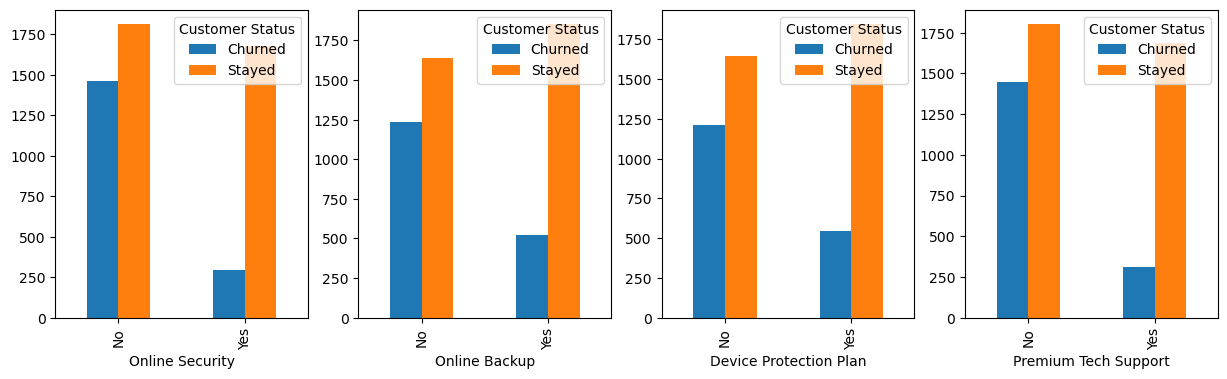

In [88]:
fig, axs = plt.subplots(1,4, figsize = (15,4))

df_without_joined.groupby(['Online Security', 'Customer Status']).size().unstack().plot(kind = 'bar', ax = axs[0])

df_without_joined.groupby(['Online Backup', 'Customer Status']).size().unstack().plot(kind = 'bar', ax = axs[1])

df_without_joined.groupby(['Device Protection Plan', 'Customer Status']).size().unstack().plot(kind = 'bar', ax = axs[2])
                                                                                               
df_without_joined.groupby(['Premium Tech Support', 'Customer Status']).size().unstack().plot(kind = 'bar', ax = axs[3])
                                                                                               
plt.show()

### Вырисовываются портреты двух сегментов пользователей:

1. Какой тип пользователей склонен остаться
2. Какой тип пользователей склонен уходить


#### 1. Женатый/замужний человек среднего возраста, имеющий детей. А также, имеющих друзей/знакомых, пользующихся услугами данной компании. Современный, пользующийся всеми современными услугами, такие как: онлайн безопасность, онлайн резервное копирование, защита устройства, премиальная техническая поддержка. Этот тип пользователей, также, больше пользуется услугами междугородней связи, и остается с компанией надолго, тем самым увеличивая LTV.

#### 2. Одинокий мужчина/женщина. Старше среднего возраста, без друзей/знакомых. В силу возраста, мало пользующийся интернетом и другими услугами компании. А также, в силу возраста, не привыкшие к современным удобным способам оплаты, и предпочитающие оплачивать по старинке.